# Quantifying Shakespeare

In this notebook we will

1. Read all of shakespeare's works into a list of strings.
2. Count the frequencies of letters used.
3. Visualize the results of the frequencies.

The dataset we will use is: <https://bit.ly/shakespeare-txt>
(I have a **shakespeare.txt** file in the lessons directory)

In [1]:
# Read the lines of Shakespeare into a list.

from io import TextIOWrapper


def read_lines(filename: str) -> list[str]:
    """Read every line from filename into a list."""
    lines: list[str] = list()
    file_handle: TextIOWrapper = open(filename, "r")
    for line in file_handle:
        line = line.lower()
        line = line.strip()
        lines.append(line)
    file_handle.close()
    return lines


shakespeare_lines: list[str] = read_lines("./shakespeare.txt")
print(len(shakespeare_lines))

218


In [2]:
# Count the frequencies of letters used (we don't distinguish between uppercase and lowercase letters.)


def tally(reference: dict[str, int], letter: str) -> None:
    """Tallies a character.""" 
    if letter in reference:
        reference[letter] += 1
    else:
        reference[letter] = 1


def count_letters(lines: list[str]) -> dict[str, int]:
    """Count the frequencies of all letters in lines."""
    counts: dict[str, int] = dict()
    for line in lines:
        for char in line:
            if char.isalpha():  # char >= "a" and char <= "z":
                tally(counts, char)
    return counts


shakespeare_letters: dict[str, int] = count_letters(shakespeare_lines)
print(shakespeare_letters)

{'o': 494, 'f': 157, 't': 562, 'h': 398, 'i': 417, 's': 423, 'a': 482, 'l': 275, 'e': 841, 'j': 4, 'w': 158, 'n': 411, 'd': 292, 'm': 194, 'r': 400, 'u': 173, 'p': 122, 'b': 107, 'v': 68, 'y': 122, 'c': 175, 'x': 10, 'g': 118, 'k': 38, 'q': 2, 'z': 2}


In [3]:
# Sort the dictionary in alphabetical order.

items_in_dict: list[tuple[str, int]] = list(shakespeare_letters.items())
items_in_dict = sorted(items_in_dict)
shakespeare_letters_sorted: dict[str, int] = dict(items_in_dict)

print(shakespeare_letters_sorted)

{'a': 482, 'b': 107, 'c': 175, 'd': 292, 'e': 841, 'f': 157, 'g': 118, 'h': 398, 'i': 417, 'j': 4, 'k': 38, 'l': 275, 'm': 194, 'n': 411, 'o': 494, 'p': 122, 'q': 2, 'r': 400, 's': 423, 't': 562, 'u': 173, 'v': 68, 'w': 158, 'x': 10, 'y': 122, 'z': 2}


<BarContainer object of 26 artists>

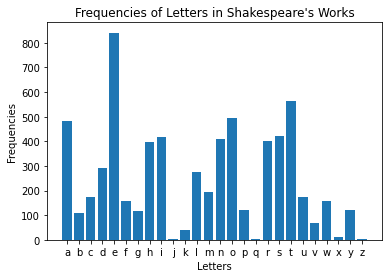

In [4]:
# VIsualize the result of our counting in a bar chart. 

from matplotlib import pyplot

# Title and Axes Names
pyplot.title("Frequencies of Letters in Shakespeare's Works")
pyplot.xlabel("Letters")
pyplot.ylabel("Frequencies")

# Get values on the graph
labels: list[str] = list(shakespeare_letters_sorted.keys())  # Call keys in shakespeare_letters and make it a list.
values: list[int] = list(shakespeare_letters_sorted.values())  # Call values in shakespeare_letters and make it a list.
pyplot.bar(labels, values)  # Put the lists on the graph.